<a href="https://colab.research.google.com/github/jfdoppler/DNL-1c2020/blob/master/DNL_1C2020_integracion_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Integración I**

## **Método de Euler**

Colabs gentileza de Juan Doppler.

Supongamos que tenemos una ecuación diferencial de esta forma:
$$
\frac{dx}{dt} = f(x, t)
$$

El [método de Euler](https://en.wikipedia.org/wiki/Euler_method) consiste en aproximar la derivada por el cociente incremental: $\frac{dx}{dt} \simeq \frac{\Delta x}{\Delta t}$:

$$
\frac{x(t+\Delta t) - x(t)}{\Delta t} = f(x, t)
$$

$$
x(t+\Delta t) = x(t)+f(x, t)\Delta t
$$

Con lo que conseguimos una regla que prescribe el valor siguiente de la función x siguiente en función de la condición inicial y del valor de la derivada.

#### **Ejemplo 1 : Modelo de Gompertz**
**(a)** *Considere el modelo de Gompertz (ej. 3 de la guía 1):*

$$
\dot{N} = -aNln(bN)
$$

*Integrelo usando el método de Euler. Varíe las condiciones iniciales y el valor de los parámetros. Compare sus resultados numéricos con su resolución en papel.*


Cambiamos la derivada por el cociente incremental (método de Euler).
$$
\frac{N(t + \Delta t) - N(t)}{\Delta t} = -aN(t) ln(bN(t))
$$
Y finalmente, tenemos nuestra regla de evolución.
$$
N(t + \Delta t) = N(t) -aN(t) ln(bN(t))\Delta t
$$

Noten que para resolver esto tenemos que definir, además de la condición incial, cual es el paso temporal. Qué les parece que puede pasar si cambiamos este valor?
Pasemos al código.

In [0]:
#La primer celda de código trae las librerías 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

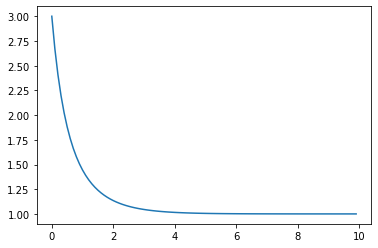

In [14]:
#Definimos el valor de los parámetros del modelo
a = 1
b = 1
#Damos el paso de integración o evolución
dt = 0.1
#Damos el vector de los tiempos para los que vamos a calcular N
t = np.arange(0, 10, step=dt)
#Definimos el vector N, por ahora son todos ceros. Lo vamos llenando al ir evolucionando con Euler.
N = np.zeros_like(t)
#Damos la condicion inicial de N.
N[0] = 3
#Y ahora sí ya hacemos la evolución de la formulita.
for i in range(len(t)-1):
    # Calculamos el siguiente punto usando el método de Euler (t -> i ; t+dt -> i+1)
    N[i + 1] = N[i] + ( - a * N[i] * np.log(b*N[i]) )* dt  

#Una figura de orden cero
plt.plot(t, N)

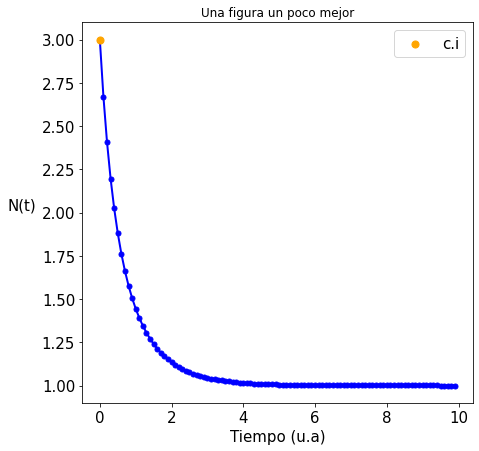

In [15]:
#Una figura un poco mejor

plt.figure(2, figsize=(7,7))
plt.title("Una figura un poco mejor") 
plt.plot(t, N, 'b.-', lw=2, markersize=10)   #lw es el grosor de la linea
plt.scatter(t[0], N[0], color="orange", s=50, label="c.i", zorder=3) #Hacemos el puntito de c.inicial ; label -> Etiqueta
plt.xlabel("Tiempo (u.a)", fontsize=15)   #Le ponemos nombre al eje x
plt.ylabel("N(t)", fontsize=15, rotation=0, labelpad=20) #Le ponemos nombre al eje y
plt.xticks(fontsize=15)  #Cambiamos el tamaño de los numeros en el eje x 
plt.yticks(fontsize=15)  #Cambiamos el tamaño de los numeros en el eje y
plt.legend(fontsize=15)  #Le decimos que ponga las etiquetas de los plots con tamaño de letra 15

**(b) Variamos condiciones iniciales**

Ahora entonces hagamos que nos integre varias condiciones iniciales. 

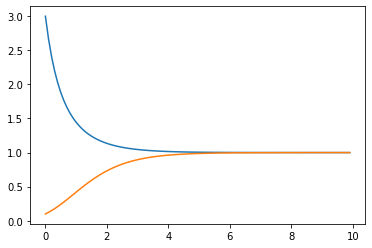

In [16]:
#Damos el valor de parametros y paso de integracion
a = 1
b = 1
dt = 0.1
#Damos el vector de los tiempos para los que vamos a calcular N
t = np.arange(0, 10, step=dt)
#Definimos el vector N, por ahora son todos ceros. Lo vamos llenando al ir evolucionando con Euler.
N = np.zeros_like(t)
#Damos la condicion inicial de N.
N[0] = 3
#Y ahora sí ya hacemos la evolución de la formulita.
for i in range(len(t)-1):
    N[i + 1] = -a*N[i]*np.log(b*N[i]) * dt + N[i]

#Ahora integramos para otra condicion inicial
N2 = np.zeros_like(t)
#Damos otra condicion inicial
N2[0] = 0.1
#La integramos
for i in range(len(t)-1):
    N2[i + 1] = -a*N2[i]*np.log(b*N2[i]) * dt + N2[i]

#Y ahora mostramos las dos 
plt.figure(1)
plt.plot(t, N)
plt.plot(t, N2)

Text(0, 0.5, 'N')

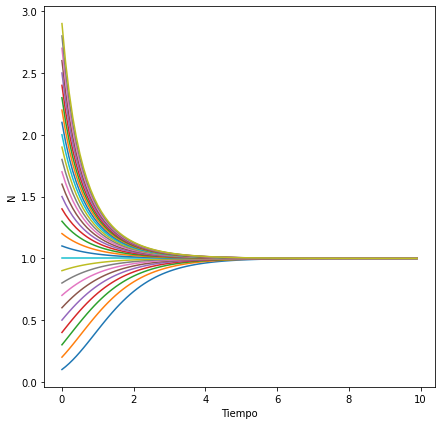

In [17]:
#Y tambien podriamos hacer un loop y que nos integre muchas 
condiciones_iniciales = np.arange(0.1,3,0.1)
plt.figure(2, figsize=(7,7))

for ci in condiciones_iniciales:
  N = np.zeros_like(t)
  #Damos la condicion inicial de N.
  N[0] = ci
  #Y ahora sí ya hacemos la evolución de la formulita.
  for i in range(len(t)-1):
    N[i + 1] = -a*N[i]*np.log(b*N[i]) * dt + N[i]
  plt.plot(t, N)

plt.xlabel("Tiempo")
plt.ylabel("N")

**(c) Variamos el paso temporal**
En general, si uno usa Euler tiene que calibrar con cuidado el paso temporal, para asegurarse de que no está haciendo cualquier cosa.

Una forma de hacer esto es hacer la integración para pasos temporales sucesivamente menores, hasta notar (con algún criterio) que la integración no cambia al refinar el paso temporal.

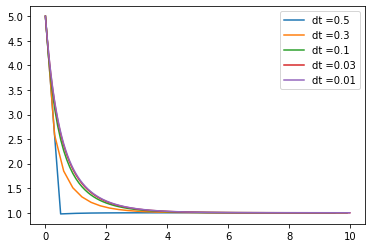

In [18]:
#Definimos una lista con varios pasos temporales
varios_dt = [0.5, 0.3, 0.1, 0.03, 0.01]
for dt in varios_dt:
    # Para cada paso de integración hacemos el proceso
    t = np.arange(0, 10, step=dt)
    a = 1
    b = 1
    N = np.zeros_like(t)
    # Fijamos una condición inicial, dandole valor al primer punto
    N[0] = 5
    for i in range(len(t)-1):
        # Calculamos el siguiente punto usando el método de Euler (t -> i ; t+dt -> i+1)
        N[i + 1] = -a*N[i]*np.log(b*N[i]) * dt + N[i]
    # Le agregamos una etiqueta a cada curva para saber que dt le correspondía
    plt.plot(t, N, label='dt ='+str(dt))
plt.legend()

**Ejercicios sugeridos:**


**(1)** Arme una función que integre por el método de Euler el modelo de Gompertz. La función debe recibir la condición inicial, el valor de los parámetros (a, b), el paso de integración (dt) y el tiempo total de integración. Debe devolver el vector de tiempos y N(t). 

**(2)** Juegue con algun sistema de la guía 2.

## Integración en 2d
**Método de Euler.**

Consideren el siguiente sistema lineal 2d:

$$
\dot{x} = 4x+2y
$$
$$
\dot{y} = -17x-5y
$$

**(a)** Analice numéricamente qué tipo de punto fijo es el origen. 

**(b)** Dibuje las trayectorias en función del tiempo (x(t) e y(t)) y en el espacio de fases. 

**(c)** Dibuje el campo vector.

-----------------------------------------------------------------------

Igual que antes, hacemos Euler:
$$
x(t+dt) = x(t) + [4 x(t)+ 2 y(t)] dt
$$
$$
y(t+dt) = y(t) + [-17 x(t) - 5y(t) ]dt
$$


In [0]:
#Damos el paso de integracion
dt = 0.01
#Definimos el vector de tiempos y los vectores x, y que iremos llenando
t = np.arange(0, 10, step=dt)
x = np.zeros_like(t)
y = np.zeros_like(t)
#Damos las condiciones iniciales
x[0] = 1.5
y[0] = 0.
#Vamos evolucionando
for i in range(len(t)-1):
    x[i + 1] = x[i] + (4*x[i] + 2*y[i]) * dt
    y[i + 1] = y[i] + (-17*x[i]-5*y[i]) * dt

Text(0, 0.5, 'y')

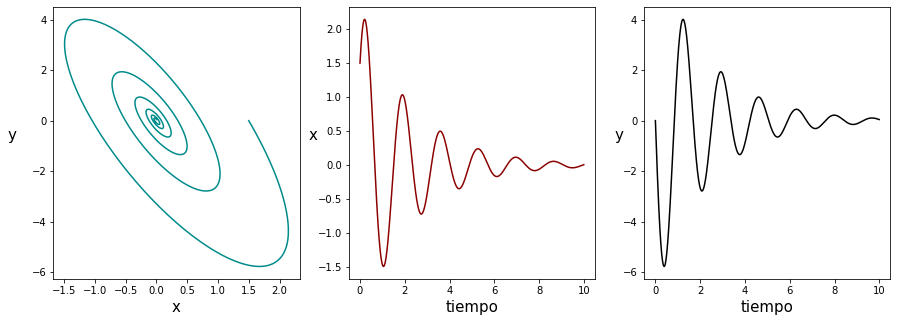

In [20]:
#Graficamos
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(x, y, 'darkcyan')
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15, rotation=0, labelpad=20)

plt.subplot(132)
plt.plot(t, x, 'darkred')
plt.xlabel("tiempo", fontsize=15)
plt.ylabel("x", rotation=0, fontsize=15)

plt.subplot(133)
plt.plot(t, y, 'k')
plt.xlabel("tiempo", fontsize=15)
plt.ylabel("y", rotation=0, fontsize=15)

**Dibujando el campo vector**

Primero armamos una grilla de puntos sobre los que calcularemos el campo vector. La grilla la armamos con [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html). 

Para graficar las flechas una opción es usar [quiver](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.quiver.html) de matplotlib. Como siempre, pueden explorar qué parámetros hay para hacerlo más bonito.


In [21]:
#Damos la grilla de puntos sobre la que miraremos el campo vector

x_grilla, y_grilla= np.meshgrid(np.linspace(-2, 2, 20),np.linspace(-6, 6, 24*2))

#Damos cuánto valen las componentes del campo vector
dx_grilla = 4 * x_grilla + 2 * y_grilla
dy_grilla = -17 * x_grilla - 5 * y_grilla

print(np.shape(dx_grilla)) #Para ver cuantas filas y columnas
print(dx_grilla[0][:]) #Miramos la primera fila, todas las columnas

(48, 20)
[-20.         -19.15789474 -18.31578947 -17.47368421 -16.63157895
 -15.78947368 -14.94736842 -14.10526316 -13.26315789 -12.42105263
 -11.57894737 -10.73684211  -9.89473684  -9.05263158  -8.21052632
  -7.36842105  -6.52631579  -5.68421053  -4.84210526  -4.        ]


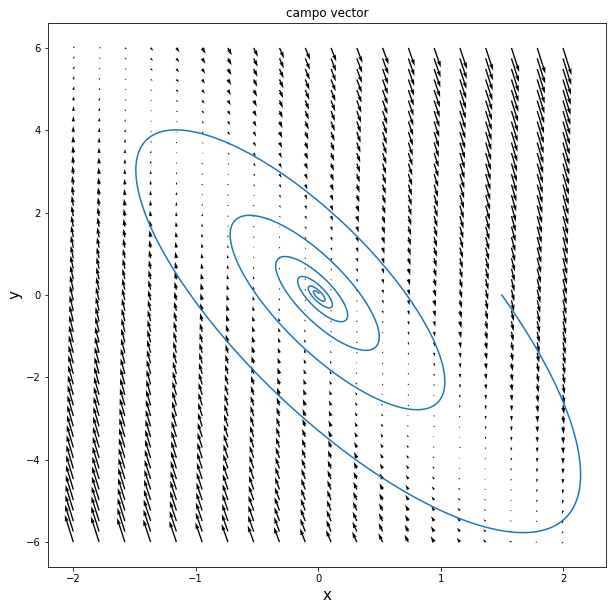

In [22]:
#Ahora las graficamos; usamos quiver de matplotlib -> chusmear la documentacion
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title("campo vector")
ax.quiver(x_grilla, y_grilla, dx_grilla, dy_grilla, color='k')
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.plot(x, y)
plt.show()


**Ejercicios sugeridos:**
(1)Dibuje el campo vector e integre el sistema del ejercicio 6e de la guía 3:

$$
\dot{x} = 5x+2y
$$
$$
\dot{y} = -17x-5y
$$

Qué tipo de punto fijo es el origen? Cómo da la integración numérica?